<a href="https://colab.research.google.com/github/kaojan05/AI/blob/main/keras_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
model.add(Conv2D(filters=15, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 15)          │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2160)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          21,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,865 (85.41 KB)

 Trainable params: 21,865 (85.41 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
mnist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.6629 - loss: 11.6789
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.9374 - loss: 0.5253
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9671 - loss: 0.1736
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.9770 - loss: 0.0928
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.9829 - loss: 0.0654
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - accuracy: 0.9868 - loss: 0.0471
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.9892 - loss: 0.0347
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.9925 - loss: 0.0256
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.9934 - loss: 0.0195
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.9948 - loss: 0.0165


In [6]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9709 - loss: 0.1520
0.9763000011444092


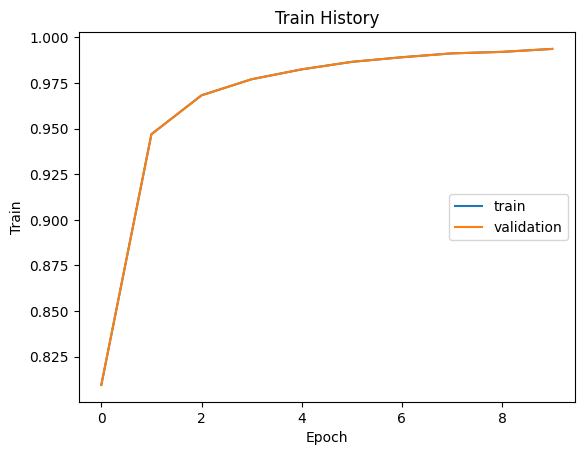

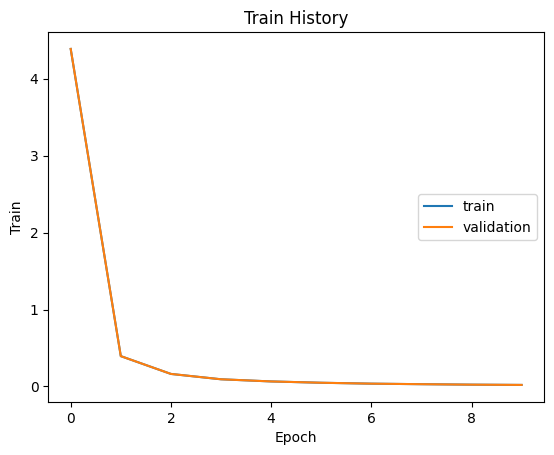

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,963,2,1,1,0,2,2,0,7,2
1,0,1096,9,1,6,2,3,1,17,0
2,1,3,1016,1,3,0,0,3,4,1
3,0,0,3,996,0,6,0,1,3,1
4,0,1,2,0,968,0,2,0,0,9
5,2,0,0,10,0,872,2,0,3,3
6,4,1,5,0,7,3,936,0,2,0
7,0,2,12,7,5,1,0,988,6,7
8,2,0,3,3,1,4,2,3,953,3


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])